In [5]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np

# fetch dataset 
car_evaluation = fetch_ucirepo(id=19) 
  
# data (as pandas dataframes) 
X = car_evaluation.data.features 
Y = car_evaluation.data.targets 

In [6]:
df = pd.concat([X, Y], axis = 1)

In [7]:
for feature in X:
    print(f'{feature}: {X[feature].unique()}')

buying: ['vhigh' 'high' 'med' 'low']
maint: ['vhigh' 'high' 'med' 'low']
doors: ['2' '3' '4' '5more']
persons: ['2' '4' 'more']
lug_boot: ['small' 'med' 'big']
safety: ['low' 'med' 'high']


In [8]:
for feature in X:
    print(f'{feature}: {X[feature].value_counts()}')

buying: buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint: maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors: doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons: persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot: lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety: safety
low     576
med     576
high    576
Name: count, dtype: int64


In [9]:
print(Y['class'].value_counts())

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [10]:
import pandas as pd
df['doors'] = df['doors'].replace('5more', 5).astype(int)
df['persons'] = df['persons'].replace('more', 5).astype(int)
df = pd.get_dummies(df, columns = ['buying', 'maint', 'lug_boot', 'safety'])

In [11]:
for idx, val in enumerate(Y['class']):
    if val == 'unacc':
        df['class'][idx] = 0
    else:
        df['class'][idx] = 1

/var/folders/j3/dc208tx13vjb_jzfx26gn4gh0000gn/T/ipykernel_2429/3800729044.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['class'][idx] = 0
/var/folders/j3/dc208tx13vjb_jzfx26gn4gh0000gn/T/ipykernel_2429/3800729044.py:3: SettingWithC

In [13]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
df['doors'] = scaler.fit_transform(df[['doors']])
df['persons'] = scaler.fit_transform(df[['persons']])

In [15]:
corr_mtx = df.corr()
corr_mtx['class']

doors             0.062137
persons           0.432104
class             1.000000
buying_high      -0.062716
buying_low        0.129808
buying_med        0.100638
buying_vhigh     -0.167730
maint_high       -0.033546
maint_low         0.100638
maint_med         0.100638
maint_vhigh      -0.167730
lug_boot_big      0.094675
lug_boot_med      0.030367
lug_boot_small   -0.125042
safety_high       0.338506
safety_low       -0.462655
safety_med        0.124149
Name: class, dtype: float64

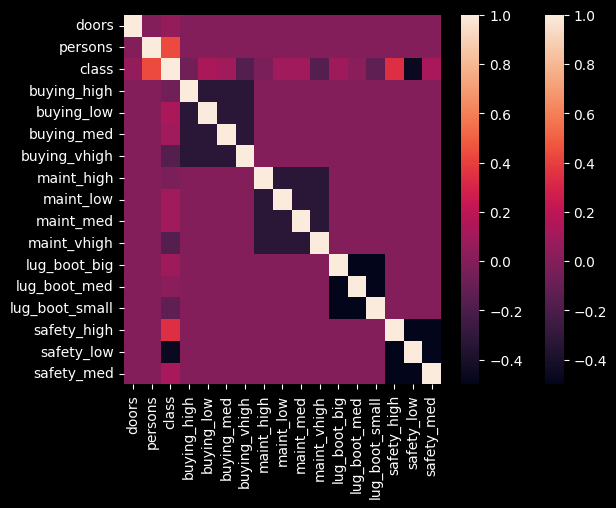

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr_mtx)
plt.show()

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.25, random_state = 42)

Y_train = pd.Series(Y_train['class'], dtype = 'category')
Y_test = pd.Series(Y_test['class'], dtype = 'category')

In [133]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm_classifier = SVC(kernel = 'linear', random_state = 42)

svm_classifier.fit(X_train, Y_train)

Y_pred = svm_classifier.predict(X_test)

print(accuracy_score(Y_test, Y_pred))

0.9248554913294798
